In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.font_manager as fm

from sklearn.preprocessing import MinMaxScaler


In [36]:
scaler1 = MinMaxScaler()
scaler2 = MinMaxScaler()

In [71]:
data = pd.read_csv('전통주카테고리.csv', encoding='utf-8-sig')
del data['Unnamed: 12']
data.columns = ['술 종류','술 이름','양조장 위치','도수','용량(ml)','가격','별점','탄산','맛','향','리뷰 빈도수','선물용']

In [72]:
data.head()

,술 종류,술 이름,양조장 위치,도수,용량(ml),가격,별점,탄산,맛,향,리뷰 빈도수,선물용
0,막걸리,복순도가,울산광역시 울주군 상북면 향산동길 50,6.5,935,12000,4.8,O,산뜻하다\n스파클링(탄산)\n꿀떡꿀떡\n순하다\n달짝지근하다(달달)\n부드럽다\n고...,청포도\r\n누룩\r\n포도\r\n복숭아\r\n향기,27821,"부모님','가족','지인','친구','명절','추석'"
1,NaN,곰표,NaN,6,500,4500,4.8,△(시간이 지나면서 탄산 쎄짐),NaN,NaN,13024,NaN
2,막걸리,죽향도가,전라남도 담양군 담양읍 삼다리 78,6,600,3800,4.8,X,부드럽다\n순하다\n굉장하다\n깔끔하다\n달콤하다\n달달\n중독\n청량하다\n텁텁(...,꿀향,5916,생일\r\n부모님\r\n가족\r\n친구\r\n명절\r\n추석
3,과실주,배상면주가 빙탄복,서울특별시 서초구 강남대로 27길 7-9 우곡빌딩 6층,7,370,4000,4.8,o,탄산음료같다\n도수가높지않다\n뒷맛이 깔끔,복분자,7754,혼술
4,과실주,산내들 소백산 스위트 와인,경상북도 영주시 단산면 좌석리 277-1,12,750,15500,4.76,x,부드러움\n목넘김\n,향긋하다,3541,"초보자용, 가격대비, 고급스러움(맛, 포장)"


In [74]:
df = data[data['술 종류']=='과실주']
df

,술 종류,술 이름,양조장 위치,도수,용량(ml),가격,별점,탄산,맛,향,리뷰 빈도수,선물용
3,과실주,배상면주가 빙탄복,서울특별시 서초구 강남대로 27길 7-9 우곡빌딩 6층,7,370,4000,4.8,o,탄산음료같다\n도수가높지않다\n뒷맛이 깔끔,복분자,7754,혼술
4,과실주,산내들 소백산 스위트 와인,경상북도 영주시 단산면 좌석리 277-1,12,750,15500,4.76,x,부드러움\n목넘김\n,향긋하다,3541,"초보자용, 가격대비, 고급스러움(맛, 포장)"
5,과실주,금이산농원 복숭아 와인,세종특별자치시 전의면 가느실길 127,12,500,20000,4..82,x,달달하다\n신맛\n깔끔하다\n자연스러움,복숭아향 약함\n은은하게 퍼짐,3794,홈파티용
6,과실주,덕유양조 산머루주,전라북도 무주군 안성면 장무로 1375-7,16,350,5700,4.79,o (아주 약간),"단맛(달달하다, 달다)",머루향 진함,1053,NaN
7,과실주,컨츄리 와인 영동포도 와인,충청북도 영동군 영동읍 조현길 30,12,750,23050,4.87,x,떫은 맛\n부드러운 목넘김\n달달,NaN,758,"선물용, 디저트, 분위기 내기"


In [78]:
df2 = df[['도수']]
df2

,도수
3,7
4,12
5,12
6,16
7,12


In [79]:
name_list =["금이산농원_복숭아와인","덕유양조_산머루주","배상면주가_빙탄복","산내들_소백산스위트와인",'컨츄리와인_영동포도와인']

x_text = '달|단'
y_text = '향긋|은은'

In [27]:
x_list = []
y_list = []
for name in name_list:
    data = pd.read_csv(f"{name}.csv", encoding='utf-8-sig')
    data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
    data.dropna(inplace=True)
    # globals()[f"{name}"]
    x_list.append(len(data[data.text.str.contains(x_text)])/len(data))
    y_list.append(len(data[data.text.str.contains(y_text)])/len(data))
x_list.append(0)
y_list.append(0)

In [28]:
x = np.array(x_list).reshape(-1,1)
y = np.array(y_list).reshape(-1,1)

In [29]:
scaled_x = scaler1.fit_transform(x)
scaled_y = scaler1.fit_transform(y)

In [25]:
target_list = ["금이산농원_복숭아와인","덕유양조_산머루주","배상면주가_빙탄복","산내들_소백산스위트와인",'컨츄리와인_영동포도와인']

In [23]:
plt.rcParams['axes.unicode_minus'] = False

font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

plt.rc('font', family=font_name) 
plt.rcParams["figure.figsize"] = (8, 8)


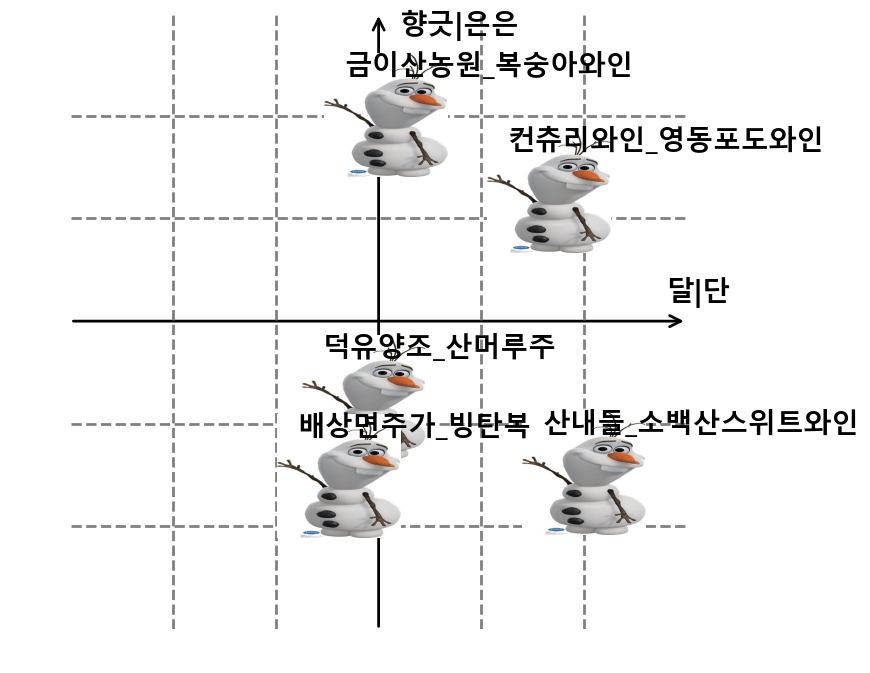

In [25]:
font = {'family' : font_name,
        'weight' : 'bold',
        'size'   : 20}

plt.plot()
plt.rc('font', **font)
plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)
plt.text(1.2,0.55,x_text)
plt.text(0.55,1.2,y_text)
plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (-0.25, 0.5),
             xy = (1.25, 0.5),
             zorder=0,
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })

plt.annotate('',
             ha = 'center', va = 'bottom',
             xytext = (0.5, -0.25),
             xy = (0.5, 1.25),
             zorder=0,
             arrowprops = {'edgecolor':'black', 
              'arrowstyle':'->',
              'lw' : 2
              })
plt.xticks([0,0.25,0.75,1], alpha=0)
plt.yticks([0,0.25,0.75,1], alpha=0)
plt.tick_params(axis='both', length=0)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.grid(True, color='gray', alpha=1, linestyle='--', lw=2,zorder=0)

for target in target_list:
    target_index = name_list.index(target)
    target_x = scaled_x[target_index]
    target_y = scaled_y[target_index]
    plt.scatter(target_x,target_y)
    img = mpimg.imread("C:/temp/olaf.jpg")
    plt.imshow(img,extent=[target_x[0]-0.15, target_x[0]+0.15, target_y[0]-0.15, target_y[0]+0.15],zorder=2)
    plt.text(target_x-0.1, target_y+0.1, name_list[target_index])
    



